<h1>Innholdsfortegnelse<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-1" data-toc-modified-id="Assignment-1-1">Assignment 1</a></span><ul class="toc-item"><li><span><a href="#Planetary-motion" data-toc-modified-id="Planetary-motion-1.1">Planetary motion</a></span><ul class="toc-item"><li><span><a href="#Convergence-test" data-toc-modified-id="Convergence-test-1.1.1">Convergence test</a></span></li><li><span><a href="#Keplers-third-law" data-toc-modified-id="Keplers-third-law-1.1.2">Keplers third law</a></span></li></ul></li></ul></li><li><span><a href="#The-precession-of-mercury" data-toc-modified-id="The-precession-of-mercury-2">The precession of mercury</a></span></li></ul></div>

## Assignment 1
### Planetary motion

$v_{y}$ is the velocity in the y-direction, $y$ is the position.
$v_{x}$ is the velocity in the x-direction, $x$ is the position.


$\vec{w_y} = \begin{bmatrix}
    v_y \\
    y\\
\end{bmatrix}$

$\vec{w_x} = \begin{bmatrix}
    v_x \\
    x\\
\end{bmatrix}$

Two systems of first order differential equations:

$\frac{d\vec{w_y}}{dt} =f(\vec{w_{i}}) =f \begin{bmatrix}
    v_y \\
    y\\
\end{bmatrix} = \begin{bmatrix}
    \frac{dv_y}{dt} \\
    \frac{dy}{dt} \\
\end{bmatrix} =
\begin{bmatrix}
    \frac{-GM_{s}y}{r^3} \\
   v_y \\
\end{bmatrix} $ 


$\frac{d\vec{w_x}}{dt} =f(\vec{w_{i}}) =f \begin{bmatrix}
    v_x \\
    x\\
\end{bmatrix} = \begin{bmatrix}
    \frac{dv_x}{dt} \\
    \frac{dx}{dt} \\
\end{bmatrix} =
\begin{bmatrix}
    \frac{-GM_{s}x}{r^3} \\
   v_x \\
\end{bmatrix} $ 

Boundary condition:
Starting point at $(x,y)=(1,0), (v_x,v_y)=(0, 2\pi)$


 $\begin{bmatrix}
   V_y\\
    y \\
\end{bmatrix} = \begin{bmatrix}
2\pi \\
0 \\
\end{bmatrix} $

 $\begin{bmatrix}
   V_x\\
    x \\
\end{bmatrix} = \begin{bmatrix}
0 \\
1 \\
\end{bmatrix} $




In [41]:
import numpy as np
import matplotlib.pyplot as plt

GMs = 4*(np.pi)**2  #AU^3/yr^2, Sun

def set_init_cond(planet): #this returns the initial conditions for each planet
    planet = planet.lower()
    if planet == 'earth':
        wy_vec = np.array([2*np.pi, 0])#y-direction, initial condition, speed, position
        wx_vec = np.array([0,1]) #x-direction, initial condition, speed, position'
        t_min = 0 #starting time
        t_max = 1 #the Earth uses 1 year to complete an orbit
        h = 0.0002 #the timestep
    elif planet == 'venus':
        v = np.sqrt(GMs/0.72) #initial velocity, found by balancing the centripetal force and the gravitional force
        wx_vec=np.array([0,0.72]) #radi til Venus-Sun orbit
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 0.615198 #uses 0.62 of 1 year to finish an orbit once.
        h = 0.0002
    elif planet == 'mars':
        v = np.sqrt(GMs/1.52)
        wx_vec=np.array([0,1.52]) #1.52 is radi in AU of the Orbit
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 1.8809
        t_max=5.55
        h = 0.002
    elif planet == 'jupiter':
        v = np.sqrt(GMs/5.20)
        wx_vec=np.array([0, 5.20])
        wy_vec=np.array([v,0])
        t_min =0
        t_max =100
        h = 0.002
    elif planet == 'saturn':
        v = np.sqrt(GMs/9.54)
        wx_vec=np.array([0,9.54])
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 100 #period in year
        h = 0.002
    elif planet =='uranus':
        v = np.sqrt(GMs/19.19)
        wx_vec=np.array([0,19.19])
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 200
        h = 0.002
    elif planet =='neptune' or planet == 'neptun':
        v = np.sqrt(GMs/30.06)
        wx_vec=np.array([0,30.06])
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 1000
        h = 0.002
    elif planet == 'mercury':
        v = 8.2 #aphelion- v minimum
        wx_vec=np.array([0,0.47])
        wy_vec=np.array([v,0])
        t_min = 0
        t_max = 1
        h = 0.0002

    else:
        raise Exception('not valid planet sorry')
    return wx_vec, wy_vec, t_min, t_max, h

def f_y(w,grad, t, r): #system of diff eq's, y-direction
    temp_vec = np.zeros(grad)
    temp_vec[1] = w[0]
    temp_vec[0] = -GMs*w[1]/(r**3) #Ms is mass of Sun
    return temp_vec
def f_x(w, grad, t, r): #x-direction
    temp_vec = np.zeros(grad)
    temp_vec[1]=w[0]
    temp_vec[0] = -GMs*w[1]/(r**3)
    return temp_vec

def stegRK4(w, t, h, f, grad, r): #a step in the RK4-algorithm
    k1 =f(w, grad, t, r) 
    k2 = f(w+h*(k1/2), grad, t+h/2, r)
    k3 = f(w+h*(k2/2), grad, t+h/2, r)
    k4 = f(w+h*k3, grad, t+h, r)
    neste_w = w + (h/6)*(k1+2*k2+2*k3+k4)
    return neste_w

def integrer_RK4(h, fx, fy, init_cond_x, init_cond_y, t_min, t_max): #implementing the RK4-algorithm
    t_start = t_min
    grad = len(init_cond_x)
    N = int((abs(t_max-t_start)/h))
    t_mat = np.linspace(t_start, t_max, abs(N+1)) #this will contain the time where RK4 is evaluted
    Mx = np.zeros([grad, N+1]) 
    Mx[:,0] = init_cond_x #sets initial conditions, x-direction
    My = np.zeros([grad,N+1])
    My[:,0] = init_cond_y #sets initial conditions, y-direction
    r_mat= np.zeros(N)
    for i in range(0,N):
        r= np.sqrt(Mx[:,i][1]**2+My[:,i][1]**2) #calculate the distance r
        r_mat[i] = r
        Mx[:,i+1]= stegRK4(Mx[:,i], t_mat[i], h, fx, grad, r) 
        My[:,i+1] = stegRK4(My[:,i], t_mat[i], h, fy, grad, r)
    return Mx, My, t_mat, r_mat

In [13]:
#ENERGY CALCULATIONS
def potential_V(r):
    V_mat = np.zeros(len(r))
    for i in range(0, len(V_mat)):
        V_mat[i] = -GMs/r[i]
    return V_mat
def kinetic(r):
    Ek_mat = np.zeros(len(r))
    for i in range(0, len(Ek_mat)):
        Ek_mat[i] = 0.5*GMs/r[i]
    return Ek_mat

In [14]:
#PLOTTING FUNCTIONS
def plott_orbit(Mx, My, planet):
    x_coord = Mx[1]
    y_coord = My[1]
    plt.plot(x_coord,y_coord)
    plt.plot(0, 0, marker='o', markersize=10, color="yellow")
    plt.title("The orbit of " + str(planet))
    plt.ylabel("y (AU)")
    plt.xlabel("x (AU)")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
def plott_velocity(Mx, My,t):
    x_vel = Mx[0]
    y_vel =My[0]
    velo = np.sqrt(x_vel**2+y_vel**2)
    plt.plot(t, velo)
    plt.title("Velocity over time")
    plt.xlabel("time (year)")
    plt.ylabel("Speed (AU/year)")
    plt.show()
def plott_position(Mx, My, t):
    x_coord = Mx[1]
    y_coord = My[1]
    plt.title("Position")
    plt.plot(t, x_coord)# x as function of time
    plt.plot (t, y_coord) # y as function of time
    plt.show()
def plott_energies(Mx, My, t, r):
    V_mat = potential_V(r)
    Ek_mat = kinetic(r)
    plt.figure("potential")
    plt.title("Potential energy")
    #plt.axis([0, 1, -1, 1])
    plt.plot(t[:-1], V_mat)
    plt.xlabel("Time (year)")
    plt.ylabel("Potential energy")
    plt.show()
    plt.figure("kinetic")
    plt.title("Kinetic energy")
    #plt.axis([0, 1, -1, 1])
    plt.xlabel("Time (year)")
    plt.plot(t[:-1], Ek_mat)
    plt.show()
    plt.figure("total energy")
    plt.plot(t[:-1], Ek_mat+V_mat)
    plt.title("Total energy")
    plt.show()


In [15]:
#SOLUTION USING EULER-CROMER
def help_cromer(wx,wy,h):
    vxi = wx[0]
    xi = wx[1]
    vyi = wy[0]
    yi = wy[1]
    ri = (xi**2 + yi**2)**(1/2)
    wx[0] = vxi - (4*(np.pi)**2*h*xi)*((ri)**(-3))
    wy[0] = vyi - (4*(np.pi)**2*h*yi)*((ri)**(-3))
    wx[1] = xi + h*wx[0]
    wy[1] = yi + h*wy[0]
    return ri, wx, wy

def euler_cromer(h, init_cond_x, init_cond_y,t_min, t_max):
    #Init_cond [speed,position]
    t_start = t_min
    N = int((abs(t_max-t_start)/h))
    t_mat = np.linspace(t_start, t_max, abs(N+1))
    r_vec = np.zeros(N)
    Mx = np.zeros([2, N+1]) 
    Mx[:,0] = init_cond_x
    My = np.zeros([2,N+1])
    My[:,0] = init_cond_y
    for i in range(0,N):
        r_vec[i], Mx[:,i+1], My[:,i+1] = help_cromer(Mx[:,i],My[:,i],h)
    return Mx, My, t_mat,r_vec

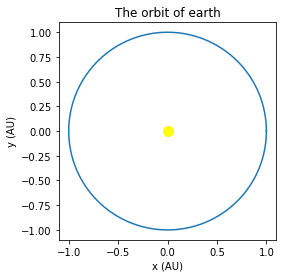

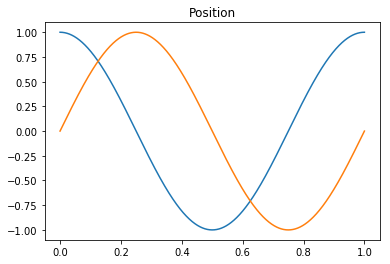

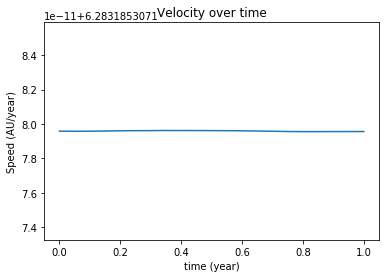

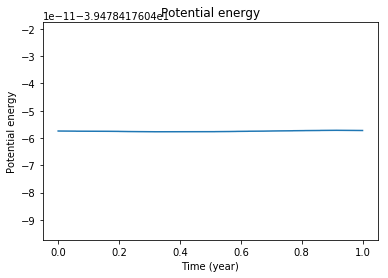

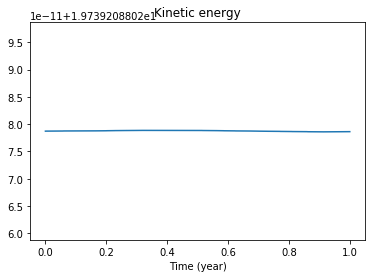

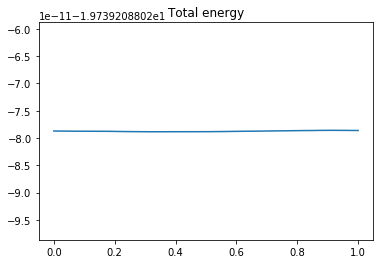

In [39]:
#THE PROGRAM
#RUNGE-KUTTA
def planetary_orbit(init_cond_x, init_cond_y, t_min, t_max, h, planet): #planet er string
    Mx, My, t, r = integrer_RK4(h, f_x, f_y, wx_vec, wy_vec, t_min, t_max)
    plott_orbit(Mx,My, planet)
    plott_position(Mx, My, t)
    plott_velocity(Mx, My,t)
    plott_energies(Mx, My, t, r)
    
my_planet = 'earth'
wx_vec, wy_vec, t_min, t_max, h= set_init_cond(my_planet)
planetary_orbit(wx_vec, wy_vec, t_min, t_max, h, my_planet)    
    


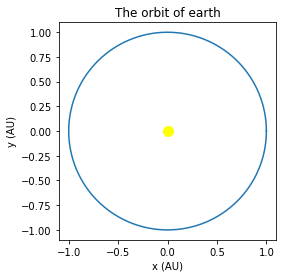

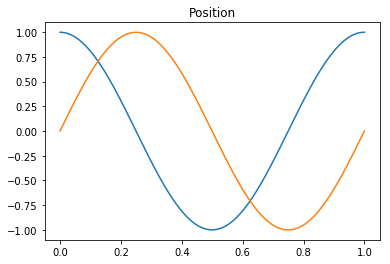

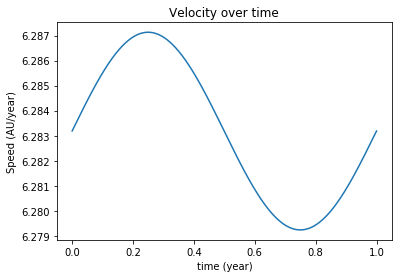

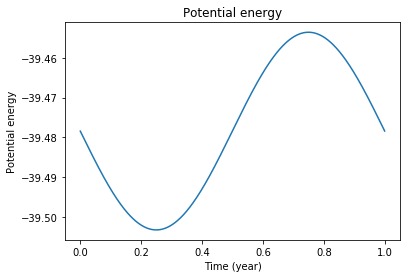

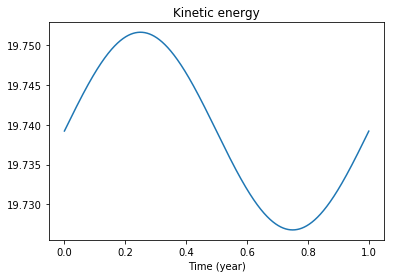

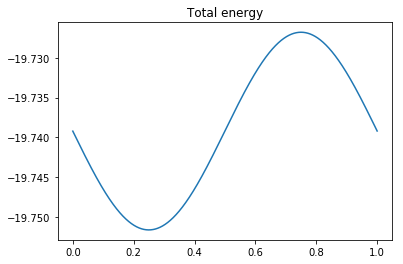

In [40]:
#EULER CROMER
def crome_orbit(init_cond_x, init_cond_y, t_min, t_max, h, planet):
    Mx, My, t_vec, r_vec = euler_cromer(h, init_cond_x, init_cond_y,t_min, t_max)
    plott_orbit(Mx,My,planet)
    plott_position(Mx, My, t_vec)
    plott_velocity(Mx, My,t_vec)
    plott_energies(Mx, My, t_vec, r_vec)
crome_orbit(wx_vec, wy_vec, t_min, t_max, h, my_planet)

#### Convergence test
Here we calculate the change in total energy after one orbit around the sun, for both Runge-Kutta and Euler-Cromer.
The energy change is calculated for timestep h, between h = 0.0001 and h = 0.1. The absolute value of the energy change is defined as the error of the method.

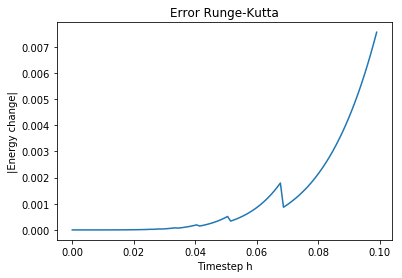

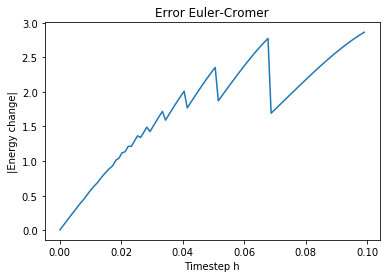

In [18]:
def konvergens(metode):
    mu = 1
    wx_vec, wy_vec, t_min, t_max, h= set_init_cond('earth')
    N= 100
    h_vec = np.linspace(0.0001,0.1,N)
    feil = np.zeros(N)
    for i in range(len(h_vec)-1):
        h = h_vec[i]
        if metode == "RK":
            Mx, My, t, r = integrer_RK4(h, f_x, f_y, wx_vec, wy_vec, t_min, t_max)
        elif metode == "EC":
            Mx, My, t, r = euler_cromer(h, wx_vec, wy_vec,t_min, t_max)
        else: 
            raise Exception("Invalid method!")
        Ek_mat = kinetic(r)
        V_mat = potential_V(r)
    
        E_tot = Ek_mat + V_mat

        feil[i] = abs(E_tot[-1] - E_tot[0])
    plt.figure()
    if metode == "RK":
        plt.title("Error Runge-Kutta")
    if metode == "EC":
        plt.title("Error Euler-Cromer")
    plt.plot(h_vec[:-1], feil[:-1])
    plt.xlabel("Timestep h")
    plt.ylabel("|Energy change|")
    plt.show()

    return feil


    
feilRK = konvergens("RK")
feilEC = konvergens("EC")

We see that the error becomes smaller for smaller timesteps, as is expected. The error in Runge-Kutta decreases faster than the error in Euler-Cromer. For Euler-Cromer the error decreases linearly.

#### Keplers third law

To demonstrate the law, we expect that the quantity
$\frac{T^{2}}{a^{3}}$ should be the same for all planets. $T$ is the orbital period, and $a$ is the semimajor axis.

We have been given the orbital period for every planet in the appendix.  $a$ is found by finding the maximum distance of the planet to the sun. 

First we will plot the orbits of the different planets, to confirm that they are nearly circular. The initial condition for each planet is found by letting the orbit start in $(x,y)=(a,0)$. The initial velocity is found by solving for $v$ in the following equation:
$\frac{mv^{2}}{r}=\frac{GMm}{r^{2}}$. 

The lefthand side is the centripetal force, while the righthand side is the gravitational force. 
In addition, we will plot the velocities and the total energy for each planet.
Afterwards, we will confirm the law by seeing that the quantity $\frac{T^{2}}{a^{3}}$ is nearly $1$ for all planets.


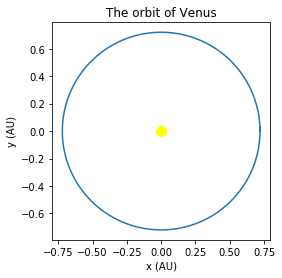

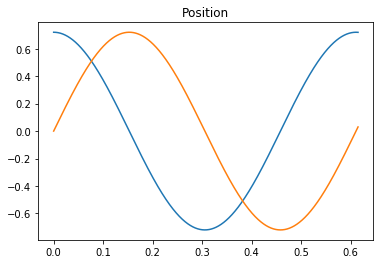

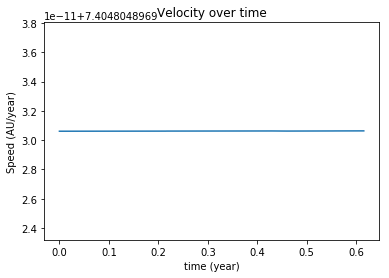

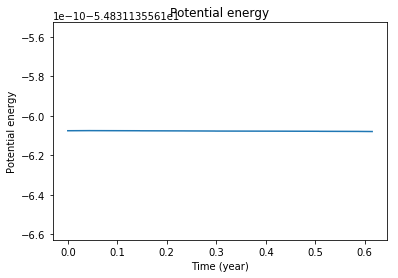

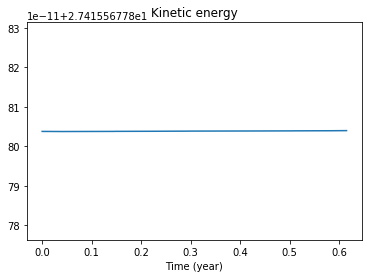

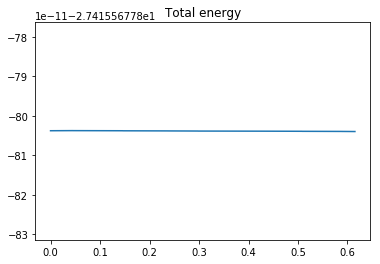

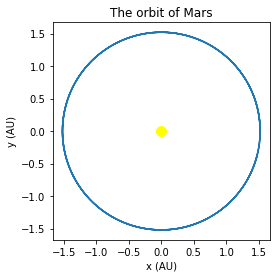

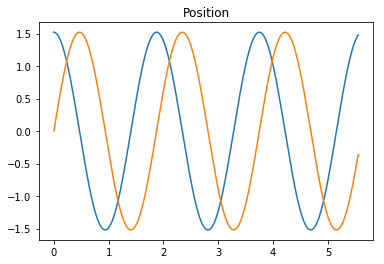

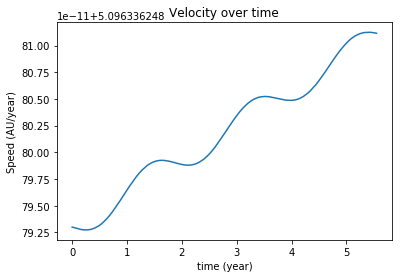

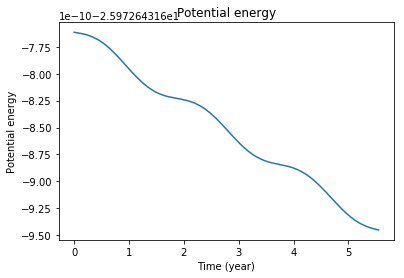

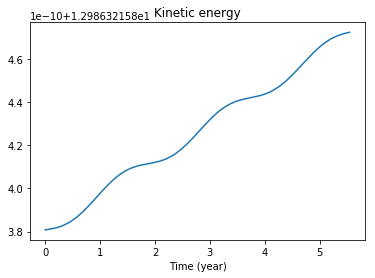

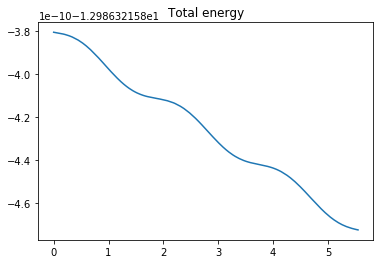

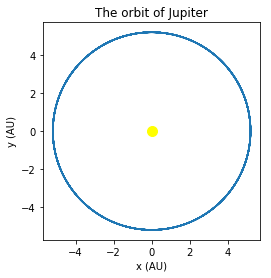

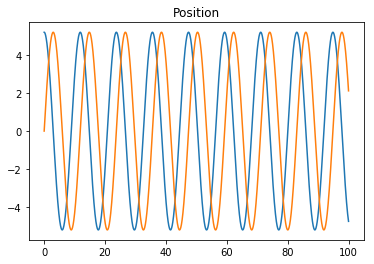

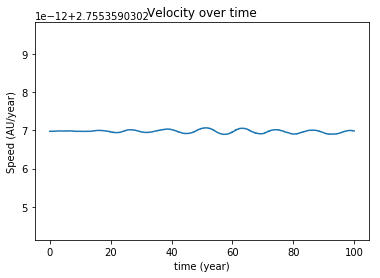

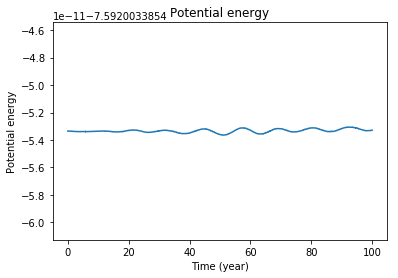

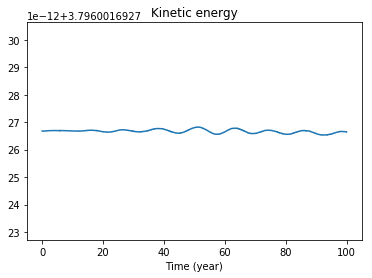

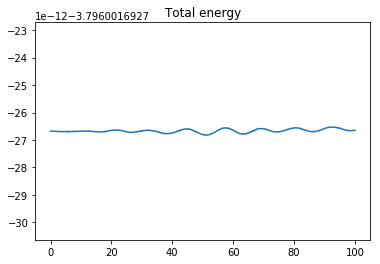

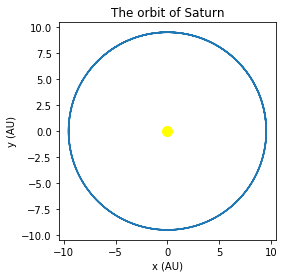

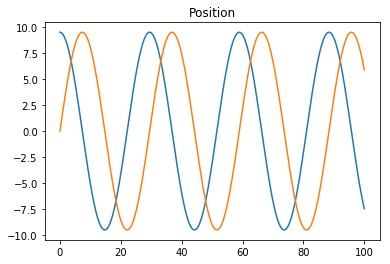

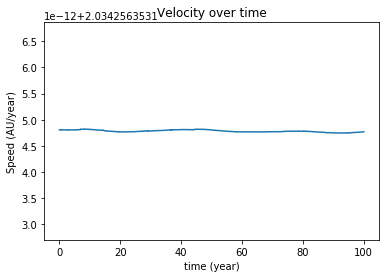

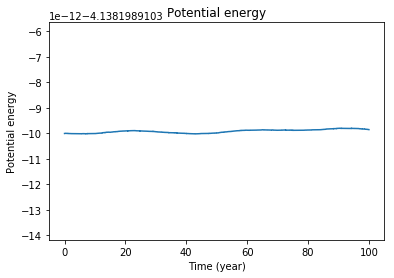

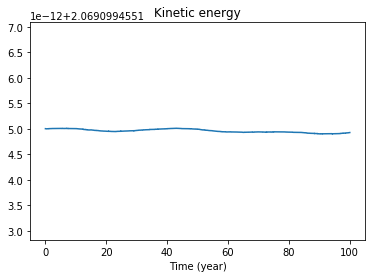

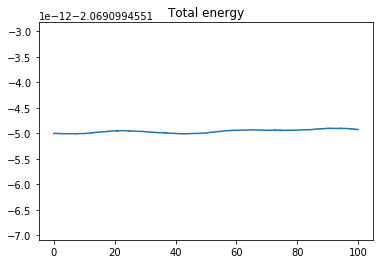

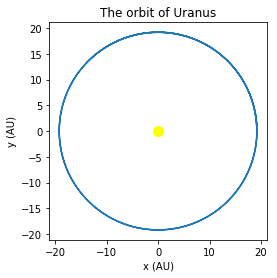

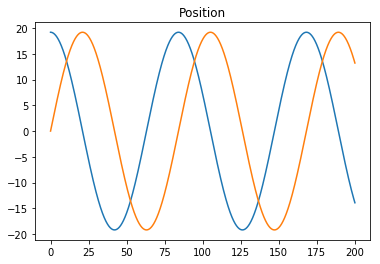

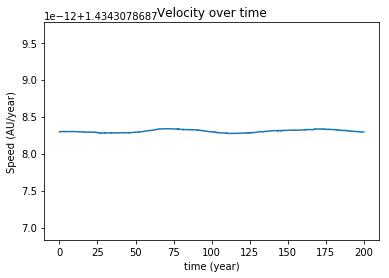

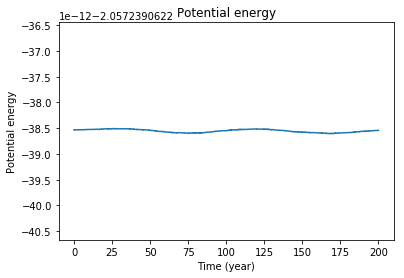

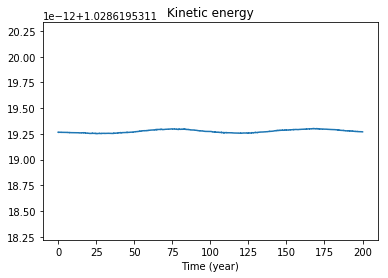

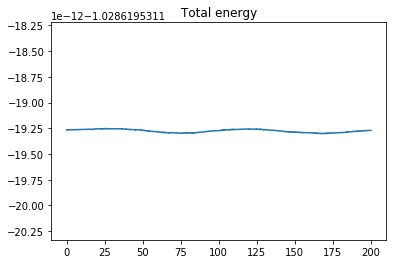

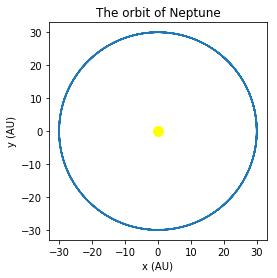

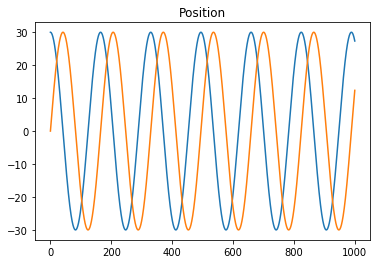

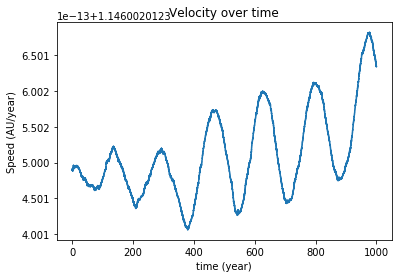

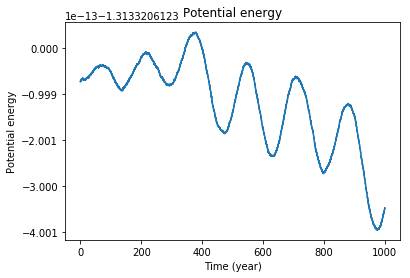

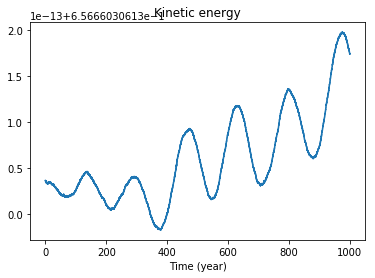

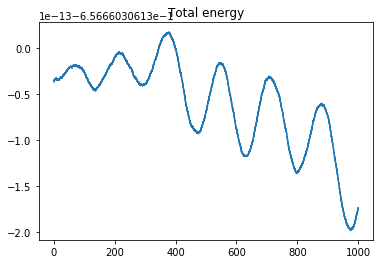

In [43]:
planet_namelist = ['Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

for i in range(len(planet_namelist)):
    my_planet = planet_namelist[i]
    wx_vec, wy_vec, t_min, t_max, h= set_init_cond(my_planet)
    planetary_orbit(wx_vec, wy_vec, t_min, t_max, h, my_planet)   


In [44]:
def K3():
    orbital_period_list=[0.615198, 1.88082,11.862, 29.4571, 84.0205,164.81] #list over the orbital period in years for each planet
    for i in range(len(planet_namelist)):
        planet = planet_namelist[i]
        period = orbital_period_list[i]
        wx_vec, wy_vec, t_min, t_max, h= set_init_cond(planet)
        Mx, My, t, r = integrer_RK4(h, f_x, f_y, wx_vec, wy_vec, t_min, t_max)
        r_max = np.amax(r) #find a, the maximum distance of the planet to the sun
        constant = period**2/(r_max**3) #calculates the constant according to Kepler's third law.
        print(planet, ": ", constant)
        
K3()


Venus :  1.0139868913001506
Mars :  1.0073112973146594
Jupiter :  1.0007043980426698
Saturn :  0.9993896652060272
Uranus :  0.9989542504938271
Neptune :  1.000000437517544


## The precession of mercury 
First we plot the orbit of mercury without the correction made by Einstein.

In [20]:
my_planet = 'mercury'
wx_vec, wy_vec, t_min, t_max, h = set_init_cond(my_planet)
t_max = 0.2408*10 #about ten orbits
planetary_orbit(wx_vec, wy_vec, t_min, t_max, h, my_planet)

3.6453250166533433


Then we make the correction.
We want to figure out how many degrees the position of the perihelion changes in a century, which is 10/0.2408 orbits, or about 41.5 orbits. In the program we will look at two orbits, to find the change between them.

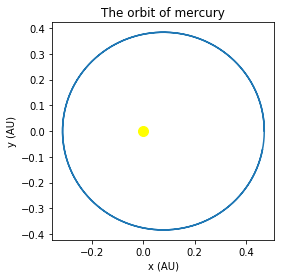

The precession angle after a century:  1802.9425751864146  arcseconds.


In [21]:
def f_y_einstein(w,grad, t, r): 
    temp_vec = np.zeros(grad)
    temp_vec[1] = w[0]
    temp_vec[0] = -(GMs*w[1]/(r**3))*(1+a/(r**2))
    return temp_vec
def f_x_einstein(w, grad, t, r): 
    temp_vec = np.zeros(grad)
    temp_vec[1]=w[0]
    temp_vec[0] = -(GMs*w[1]/(r**3))*(1+a/(r**2))
    return temp_vec


def mercury_precession(planet):
    Mx, My, t, r = integrer_RK4(h, f_x_einstein, f_y_einstein, wx_vec, wy_vec, t_min, t_max)
    plott_orbit(Mx,My, planet)
    ri = 1000 #will become position of perihelion in r-array
    count = 0
    new_round = 0
    peri_pos = 0
    for i in range(len(t)-1): #This loop finds the place in r-arry where the new orbit begins
        if My[1][i]*My[1][i+1] <= 0:
            count += 1
            if count == 3:
                new_round = i
                
    for i in range(new_round):
        if r[i] < ri:
            ri = r[i]
            peri_pos = i
    first_peri_pos = peri_pos #The element in r-array that contains first perihelion
    

    peri_pos = 0 
    ri = 1000
    for i in range(new_round+1,len(r)):
        if r[i] < ri:
            ri = r[i]
            peri_pos = i
    second_peri_pos = peri_pos #The element in r-array that contains second perihelion

    
    angle_first = np.arctan((My[1][first_peri_pos])/(Mx[1][first_peri_pos]))
    angle_second = np.arctan((My[1][second_peri_pos])/(Mx[1][second_peri_pos]))
    angle_change = (angle_second-angle_first) #precession angle for one orbit in radians
    precession = (41*angle_change)*(648000/np.pi) #precession angle in arcseconds after 41 orbit or around one century
    print("The precession angle after a century: ", precession, " arcseconds.")


a = 1.1e-8   #alpha
my_planet = 'mercury'
wx_vec, wy_vec, t_min, t_max, h= set_init_cond(my_planet)
h = 0.00001

t_max = 0.2408*2
mercury_precession(my_planet)

1802 arcseconds in a century is obviously nowhere near the expected 43 arcseconds. This error is because of the very rough method we use to find the angles.